In [1]:
%load_ext tensorboard
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [2]:
(X_TRAIN,Y_TRAIN),(X_TEST,Y_TEST) = tf.keras.datasets.mnist.load_data()

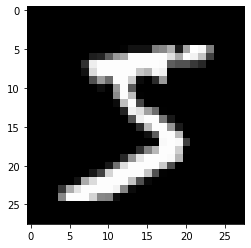

In [3]:
plt.imshow(X_TRAIN[0],cmap='gray')

In [4]:
# rescalling data

x_train = X_TRAIN/255.0
x_test = X_TEST/255.0

 

In [5]:
x_train[0].shape

(28, 28)

In [7]:


class AutoEncoder:
    
    def __init__(self,shape_x=28,shape_y=28,channels=1) :
        self.shape_x = shape_x
        self.shape_y = shape_y
        self.channels = channels
        self.autoencoder = None
    
    def Autoencoder(self,x_data,y_data,dense=0,dense_values=[64,32,16],output=64,lRate=0.001,epochs=3,batch_size=32):
        
        # dense => No of Dense Layers
        # dense_values = is a list of no of cell per dense layer by default they will get value nearest to perfect sq
        # max hidden layer 3
        # output is set to 64 for dense = 0
        
        # may be would add LSTM etc
        
        if dense > 3:
            return 'Error- Chossen More than 3 dense layers!!!'
        
        
        #  Encoder -- 
        
        encoder_input = keras.Input((self.shape_x,self.shape_y,self.channels))
        flaten = keras.layers.Flatten()(encoder_input)
        
        dense_layers = []
        
        if dense > 0:
            for i in range(dense):
                
                if i == 0 :
                    layer = keras.layers.Dense(dense_values[i],activation='relu')(flaten)
                else:
                    layer = keras.layers.Dense(dense_values[i],activation='relu')(dense_layers[-1])
                    
                dense_layers.append(layer)
            
        
        if len(dense_layers) == 0:
            encoder_output = keras.layers.Dense(output)(flaten)
        else:
            encoder_output = keras.layers.Dense(output)(dense_layers[-1])
        
        # Encoder Model
        encoder = keras.Model(encoder_input,encoder_output)
        
        # Decoder --
        
        decoder_layers = []
        
        if dense > 0:
            for i in range(dense,-1,-1):
                
                if i == 0:
                    layers = keras.layers.Dense(dense_values[i],activation='relu')(encoder_output)
                else:
                    layers = keras.layers.Dense(dense_values[i],activation='relu')(decoder_layers[-1])
                    
                decoder_layers.append(layers)
                
            
        if dense == 0:
            decoder_output = keras.layers.Dense(self.shape_x*self.shape_y,activation='relu')(encoder_output)
        else:
            decoder_output = keras.layers.Dense(self.shape_x*self.shape_y,activation='relu')(decoder_layers[-1])
            

        optimizer = keras.optimizers.Adam(learning_rate = lRate)
        
        autoencoder = keras.Model(encoder_input,decoder_output)
        print(autoencoder.summary())
        autoencoder.compile(optimizer,loss='mse')
        autoencoder.fit(x_data,y_data,epochs=epochs,batch_size=batch_size)
        
        
    def SaveModel(self):
        name = "ancoder_{}".format(time.time())
        self.autoencoder.save(name)
        

# testing

(X_TRAIN,Y_TRAIN),(X_TEST,Y_TEST) = tf.keras.datasets.mnist.load_data()

x_train = X_TRAIN/255.0
x_test = X_TEST/255.0

autoencoder = AutoEncoder()

autoencoder.Autoencoder(x_train,x_train)

n_x = x_train[0]
plt.imshow(n_x,cmap='gray')
plt.show()


auto_enco = autoencoder.predict(n_x.reshape(-1,28,28,1))[0]
plt.imshow(auto_enco,cmap='gray')
plt.show()
auto_enco = auto_enco>0.3
plt.imshow(auto_enco,cmap='gray')
plt.show()



Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_3 (Dense)              (None, 784)               50960     
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/3


ValueError: in user code:

    C:\Users\SUDHANSHU\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:805 train_function  *
        return step_function(self, iterator)
    C:\Users\SUDHANSHU\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\SUDHANSHU\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\SUDHANSHU\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\SUDHANSHU\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\SUDHANSHU\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:788 run_step  **
        outputs = model.train_step(data)
    C:\Users\SUDHANSHU\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:755 train_step
        loss = self.compiled_loss(
    C:\Users\SUDHANSHU\anaconda3\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:203 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\Users\SUDHANSHU\anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:152 __call__
        losses = call_fn(y_true, y_pred)
    C:\Users\SUDHANSHU\anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:256 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\Users\SUDHANSHU\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\SUDHANSHU\anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:1198 mean_squared_error
        return K.mean(math_ops.squared_difference(y_pred, y_true), axis=-1)
    C:\Users\SUDHANSHU\anaconda3\lib\site-packages\tensorflow\python\ops\gen_math_ops.py:10249 squared_difference
        _, _, _op, _outputs = _op_def_library._apply_op_helper(
    C:\Users\SUDHANSHU\anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py:748 _apply_op_helper
        op = g._create_op_internal(op_type_name, inputs, dtypes=None,
    C:\Users\SUDHANSHU\anaconda3\lib\site-packages\tensorflow\python\framework\func_graph.py:590 _create_op_internal
        return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
    C:\Users\SUDHANSHU\anaconda3\lib\site-packages\tensorflow\python\framework\ops.py:3528 _create_op_internal
        ret = Operation(
    C:\Users\SUDHANSHU\anaconda3\lib\site-packages\tensorflow\python\framework\ops.py:2015 __init__
        self._c_op = _create_c_op(self._graph, node_def, inputs,
    C:\Users\SUDHANSHU\anaconda3\lib\site-packages\tensorflow\python\framework\ops.py:1856 _create_c_op
        raise ValueError(str(e))

    ValueError: Dimensions must be equal, but are 32 and 28 for '{{node mean_squared_error/SquaredDifference}} = SquaredDifference[T=DT_FLOAT](model_3/dense_3/Relu, IteratorGetNext:1)' with input shapes: [32,784], [32,28,28].


In [57]:
encoder_inp = keras.Input(shape = (28,28,1))
flat = keras.layers.Flatten()(encoder_inp)

enc_hl1 = keras.layers.Dense(64,activation='relu')(flat)
#enc_hl2 = keras.layers.Dense(32,activation='relu')(enc_hl1)
encoder = keras.Model(encoder_inp,enc_hl1)

#dec_inp1 =  keras.layers.Dense(32,activation='relu')(enc_hl2)
dec_inp = keras.layers.Dense(784,activation='relu')(enc_hl1)
dec_out = keras.layers.Reshape((28,28,1))(dec_inp)

optim = keras.optimizers.Adam(lr=0.001)
autoencoder = keras.Model(encoder_inp,dec_out)

autoencoder.summary()




Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_16 (Dense)             (None, 784)               50960     
_________________________________________________________________
reshape_3 (Reshape)          (None, 28, 28, 1)         0         
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________


In [22]:
import time
import os
from keras.callbacks import TensorBoard

In [58]:

name = 'model_dlx1_{}'.format(int(time.time()))
name = os.path.join("logs",name)
tb= TensorBoard(log_dir=name)
autoencoder.compile(optim,loss='mse')
mod = autoencoder.fit(x_train,x_train,epochs=10,batch_size=32,validation_split=0.1,callbacks=[tb])

Epoch 1/10
1688/1688 [==============================] - 11s 6ms/step - loss: 0.0283 - val_loss: 0.0123
Epoch 2/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0121 - val_loss: 0.0116
Epoch 3/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0116 - val_loss: 0.0113
Epoch 4/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0113 - val_loss: 0.0110
Epoch 5/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0110 - val_loss: 0.0110
Epoch 6/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0109 - val_loss: 0.0110
Epoch 7/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0110 - val_loss: 0.0109
Epoch 8/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0109 - val_loss: 0.0109
Epoch 9/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0109 - val_loss: 0.0109
Epoch 10/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.01

In [ ]:
import tensorboard
import numpy as np
import pandas as pd

# Compresion Using Auto Encoder

In [49]:
# lets see how the encoder converts

img1 = x_test[0]
enc_pred = encoder.predict(img1.reshape(-1,28,28,1))[0] # we are putting a org test img


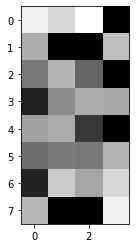

In [52]:
plt.imshow(enc_pred.reshape(8,4),cmap='gray')

In [53]:
auto_enco = autoencoder.predict(img1.reshape(-1,28,28,1))[0]

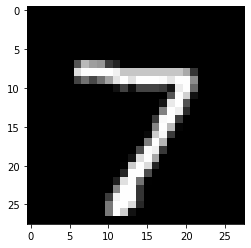

In [43]:

plt.imshow(img1,cmap='gray')

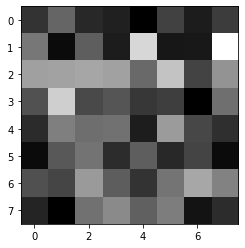

In [44]:
plt.imshow(enc_pred.reshape(8,8),cmap='gray')

In [45]:
auto_enco = autoencoder.predict(img1.reshape(-1,28,28,1))[0]

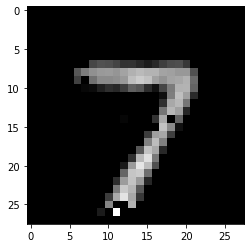

In [55]:
plt.imshow(auto_enco,cmap='gray')

In [62]:
import random
def add_noise(img, random_chance=5):
    noisy = []
    for row in img:
        new_row = []
        for pix in row:
            if random.choice(range(100)) <= random_chance: 
                new_val = random.uniform(0, 1)
                new_row.append(new_val)
            else:
                new_row.append(pix)
        noisy.append(new_row)
    return np.array(noisy)

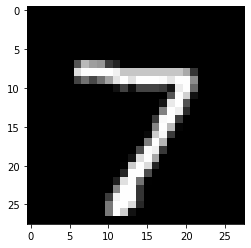

In [63]:
plt.imshow(x_test[0],cmap='gray')

# Removing Noice using Aencoder

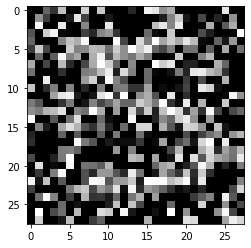

In [109]:
n_x = add_noise(x_test[15],random_chance=50)
plt.imshow(n_x,cmap='gray')

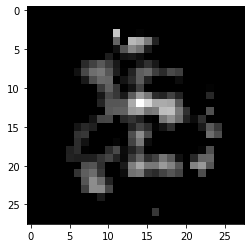

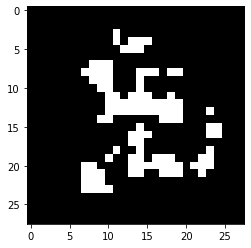

In [110]:
auto_enco = autoencoder.predict(n_x.reshape(-1,28,28,1))[0]
plt.imshow(auto_enco,cmap='gray')
plt.show()
auto_enco = auto_enco>0.3
plt.imshow(auto_enco,cmap='gray')